In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 6\data'

In [3]:
df_complete = pd.read_pickle(os.path.join(path, 'listings_calendar_details.pkl'))

In [4]:
df_complete.columns

Index(['id', 'date', 'available', 'daily_price', 'month', 'avg_monthly_price',
       'listing_avg_price_year', 'availability_rate_month', 'name', 'street',
       'neighbourhood', 'city', 'latitude', 'longitude', 'room_type',
       'square_feet', 'availability_365', 'host_listings_count',
       'review_scores_rating', 'review_scores_location', 'review_scores_value',
       'review_scores_cleanliness', 'entire_home', 'private_room',
       'shared_room', 'distance_from_center'],
      dtype='object')

In [5]:
df_complete.drop(columns='_merge', inplace=True)

KeyError: "['_merge'] not found in axis"

In [23]:
df_complete.isnull().sum()

id                                 0
date                               0
available                          0
daily_price                  6110879
month                              0
avg_monthly_price            5657341
listing_avg_price_year       3410560
availability_rate_month            0
name                           13870
street                           730
neighbourhood                      0
city                               0
latitude                           0
longitude                          0
room_type                          0
square_feet                  7162760
availability_365                   0
host_listings_count                0
review_scores_rating          963235
review_scores_location        970900
review_scores_value           970535
review_scores_cleanliness     966155
entire_home                        0
private_room                       0
shared_room                        0
distance_from_center               0
dtype: int64

In [25]:
#address the null distance values
df_complete[['name','neighbourhood','city','street','latitude','longitude']].loc[df_complete['distance_from_center'].isnull()].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
#define and apply haversine formula with Dam Square coordinates as center
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 
    return c * r

In [29]:
df_complete['distance_from_center'].fillna(haversine(52.365754513876176, 4.941419235184398, 52.373100, 4.892351), inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\62472330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_complete['distance_from_center'].fillna(haversine(52.365754513876176, 4.941419235184398, 52.373100, 4.892351), inplace=True)


In [31]:
df_complete['distance_from_center'].isnull().sum()

0

#### Creating a subset with variables to use in task

##### Choosing numeric variables to explore.

In [35]:
df_sub = df_complete[['id','daily_price', 'availability_365','review_scores_rating','review_scores_location','review_scores_value','review_scores_cleanliness','host_listings_count','distance_from_center', 'square_feet','room_type']]

In [37]:
df_sub.shape

(7310950, 11)

In [39]:
df_sub.duplicated().sum()

7231135

In [40]:
df_sub['average_price_year'] = df_sub.groupby('id')['daily_price'].transform('mean')

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\1655312880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['average_price_year'] = df_sub.groupby('id')['daily_price'].transform('mean')


In [41]:
df_sub.drop(columns='daily_price', inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\253051252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(columns='daily_price', inplace=True)


In [42]:
df_sub1 = df_sub.drop_duplicates()

In [43]:
df_sub1.isnull().sum()

id                               0
availability_365                 0
review_scores_rating          2639
review_scores_location        2660
review_scores_value           2659
review_scores_cleanliness     2647
host_listings_count              0
distance_from_center             0
square_feet                  19624
room_type                        0
average_price_year            9344
dtype: int64

In [45]:
#adjust scale of variables
df_sub1[['review_scores_rating','review_scores_location','review_scores_value','review_scores_cleanliness']].describe()

,review_scores_rating,review_scores_location,review_scores_value,review_scores_cleanliness
count,17391.000000,17370.000000,17371.000000,17383.000000
mean,94.849520,9.421531,9.175004,9.465627
std,6.648685,0.727931,0.805422,0.867973
min,20.000000,2.000000,2.000000,2.000000
25%,93.000000,9.000000,9.000000,9.000000
50%,97.000000,10.000000,9.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000


In [48]:
df_sub1['review_scores_location_100'] = df_sub1['review_scores_location']*10
df_sub1['review_scores_value_100'] = df_sub1['review_scores_location']*10
df_sub1['review_scores_cleanliness_100'] = df_sub1['review_scores_cleanliness']*10

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\1125592880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1['review_scores_location_100'] = df_sub1['review_scores_location']*10
C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\1125592880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1['review_scores_value_100'] = df_sub1['review_scores_location']*10
C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\1125592880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [49]:
df_sub1.drop(columns=['review_scores_value','review_scores_location','review_scores_cleanliness'], inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\1864130296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1.drop(columns=['review_scores_value','review_scores_location','review_scores_cleanliness'], inplace=True)


In [50]:
#scale distance variable from km to m
df_sub1['meters_from_center'] = df_sub1['distance_from_center']*1000

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\3026541968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1['meters_from_center'] = df_sub1['distance_from_center']*1000


In [57]:
df_sub1.drop(columns='distance_from_center', inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\3072759336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1.drop(columns='distance_from_center', inplace=True)


In [59]:
df_sub1.isnull().sum()

id                                   0
availability_365                     0
review_scores_rating              2639
host_listings_count                  0
square_feet                      19624
room_type                            0
average_price_year                9344
review_scores_location_100        2660
review_scores_value_100           2660
review_scores_cleanliness_100     2647
meters_from_center                   0
dtype: int64

In [61]:
df_sub1.drop(columns='id', inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_21484\989258578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1.drop(columns='id', inplace=True)


In [63]:
df_sub1.describe()

,availability_365,review_scores_rating,host_listings_count,square_feet,average_price_year,review_scores_location_100,review_scores_value_100,review_scores_cleanliness_100,meters_from_center
count,20030.000000,17391.000000,20030.000000,406.000000,10686.000000,17370.000000,17370.000000,17383.000000,20030.000000
mean,59.913679,94.849520,4.734698,520.485222,179.594235,94.215314,94.215314,94.656273,2679.424316
std,104.027710,6.648685,22.921886,544.557660,180.678095,7.279310,7.279310,8.679734,1624.734096
min,0.000000,20.000000,1.000000,0.000000,21.431818,20.000000,20.000000,20.000000,22.258728
25%,0.000000,93.000000,1.000000,0.000000,106.344828,90.000000,90.000000,90.000000,1645.234699
50%,3.000000,97.000000,1.000000,484.000000,148.506881,100.000000,100.000000,100.000000,2427.630452
75%,67.000000,100.000000,1.000000,807.000000,205.520236,100.000000,100.000000,100.000000,3271.239872
max,365.000000,100.000000,208.000000,4306.000000,8500.000000,100.000000,100.000000,100.000000,11421.314722


#### Create correlation matrix 

In [66]:
df_sub2 = df_sub1.drop(columns='room_type')

In [68]:
df_sub2.corr()

,availability_365,review_scores_rating,host_listings_count,square_feet,average_price_year,review_scores_location_100,review_scores_value_100,review_scores_cleanliness_100,meters_from_center
availability_365,1.000000,-0.020239,-0.001557,0.013929,0.145356,0.046862,0.046862,0.031422,-0.007019
review_scores_rating,-0.020239,1.000000,-0.134013,0.076877,0.010287,0.354540,0.354540,0.672950,0.007571
host_listings_count,-0.001557,-0.134013,1.000000,0.001873,0.064890,-0.054557,-0.054557,-0.077346,-0.023236
square_feet,0.013929,0.076877,0.001873,1.000000,0.373671,0.117316,0.117316,-0.018221,-0.036976
average_price_year,0.145356,0.010287,0.064890,0.373671,1.000000,0.097081,0.097081,-0.016127,-0.012460
review_scores_location_100,0.046862,0.354540,-0.054557,0.117316,0.097081,1.000000,1.000000,0.263319,-0.007812
review_scores_value_100,0.046862,0.354540,-0.054557,0.117316,0.097081,1.000000,1.000000,0.263319,-0.007812
review_scores_cleanliness_100,0.031422,0.672950,-0.077346,-0.018221,-0.016127,0.263319,0.263319,1.000000,0.005757
meters_from_center,-0.007019,0.007571,-0.023236,-0.036976,-0.012460,-0.007812,-0.007812,0.005757,1.000000


In [70]:
df_sub2.corr().to_clipboard()

##### The numbers in this correlation matrix represent the strength of the relationship between each variable. A correlation coefficient of 1 indicates a perfectly matching relationship, a coefficient of 0 indicates no relationship at all. A negative value indicates an inverse relationship.

#### Create correlation heatmap

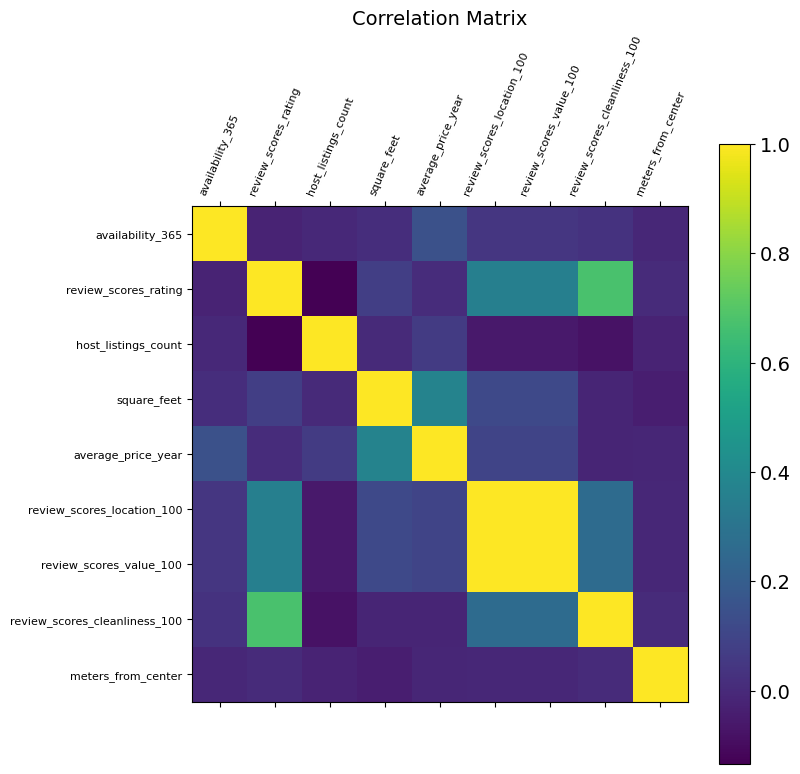

In [238]:
f = plt.figure(figsize=(8, 8))
plt.matshow(df_sub2.corr(), fignum=f.number)
plt.xticks(range(df_sub2.shape[1]), df_sub2.columns, fontsize=8, rotation=67.5)
plt.yticks(range(df_sub2.shape[1]), df_sub2.columns, fontsize=8)
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=14)
plt.show()

##### The strongest positive correlation is between review scores for cleanliness and overall review score rating. This indicates that cleanliness is among the most important factors for AirBnB guests when choosing accommodation. Location and value also show high correlations with overall review score rating. 
##### Listings with hosts who have multiple listings are likely to be rated poorly overall as well as for cleanliness, as shown by the negative correlations between host listing count and these latter two variables. This indicates that hosts who offer multiple listings are perhaps less likely to pay attention to the cleanliness and overall quality of the accommodations they offer than those with few or only one listing.
##### There is a positive correlation between average listing price and size in square feet, as well as between average listing price and availability throughout the year. This indicates that larger rental spaces are likely to be priced higher and that more expensive listings are available for more days during the year.

#### Scatterplots

#### Price and Vacancy Rate

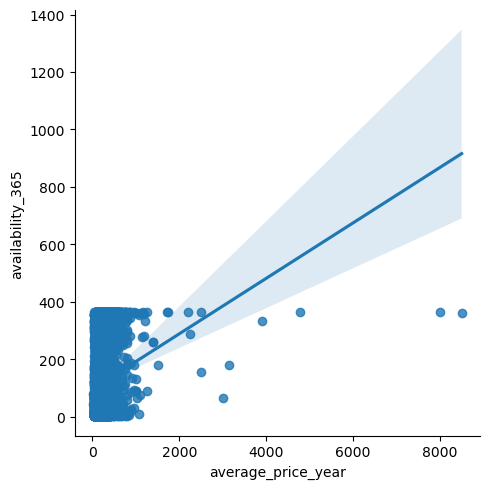

In [240]:
sns.lmplot(x = 'average_price_year', y = 'availability_365', data = df_sub2)

##### There is a clear positive correlation between price and vacancy during the year. However, it is not the strongest, as seen by the number of data points nowhere near the line.

#### Size (square feet) and price

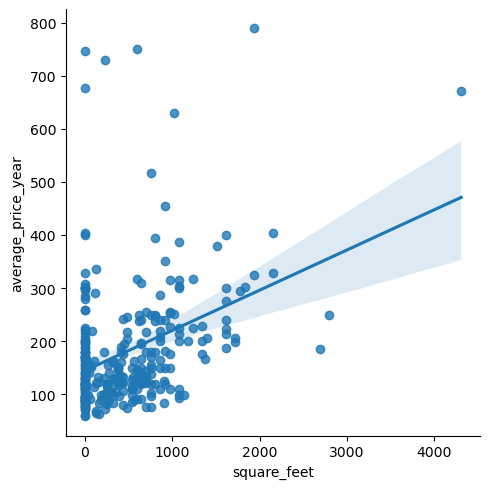

In [242]:
sns.lmplot(x = 'square_feet', y = 'average_price_year', data = df_sub2)

##### This shows a slight positive correlation between listing price and size in square feet. We can also see that the distribution of listings by size skews heavily to the left, with the vast majority of listings offering small spaces (as is typical in major cities like Amsterdam).

#### Number of Listings owned by Host and Cleanliness Rating

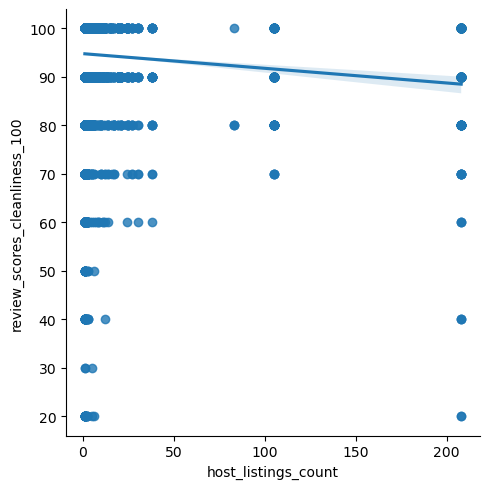

In [244]:
sns.lmplot(x = 'host_listings_count', y = 'review_scores_cleanliness_100', data = df_sub2)

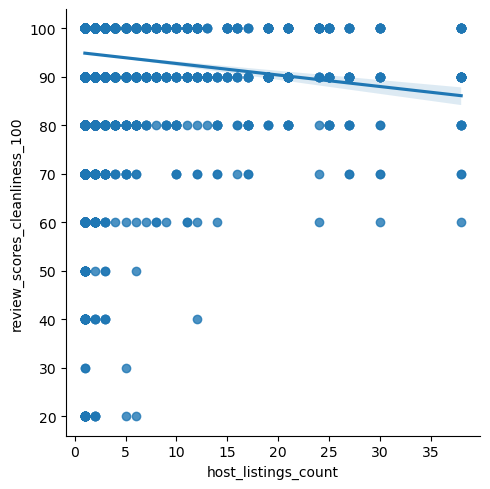

In [246]:
#to get a better look at this correlation, recreating the scatterplot without the higher host_listings_count values
sns.lmplot(x = 'host_listings_count', y = 'review_scores_cleanliness_100', data = df_sub2.loc[df_sub2['host_listings_count']<50])

##### Both of these scatterplots show a slight negative correlation between the cleanliness rating of a listing given by reviews and the number of listings by the host. We can also see that the distribution of host listings skews to the left, meaning that the majority of hosts put up a single listing or a small number of listings.

#### Pair Plot

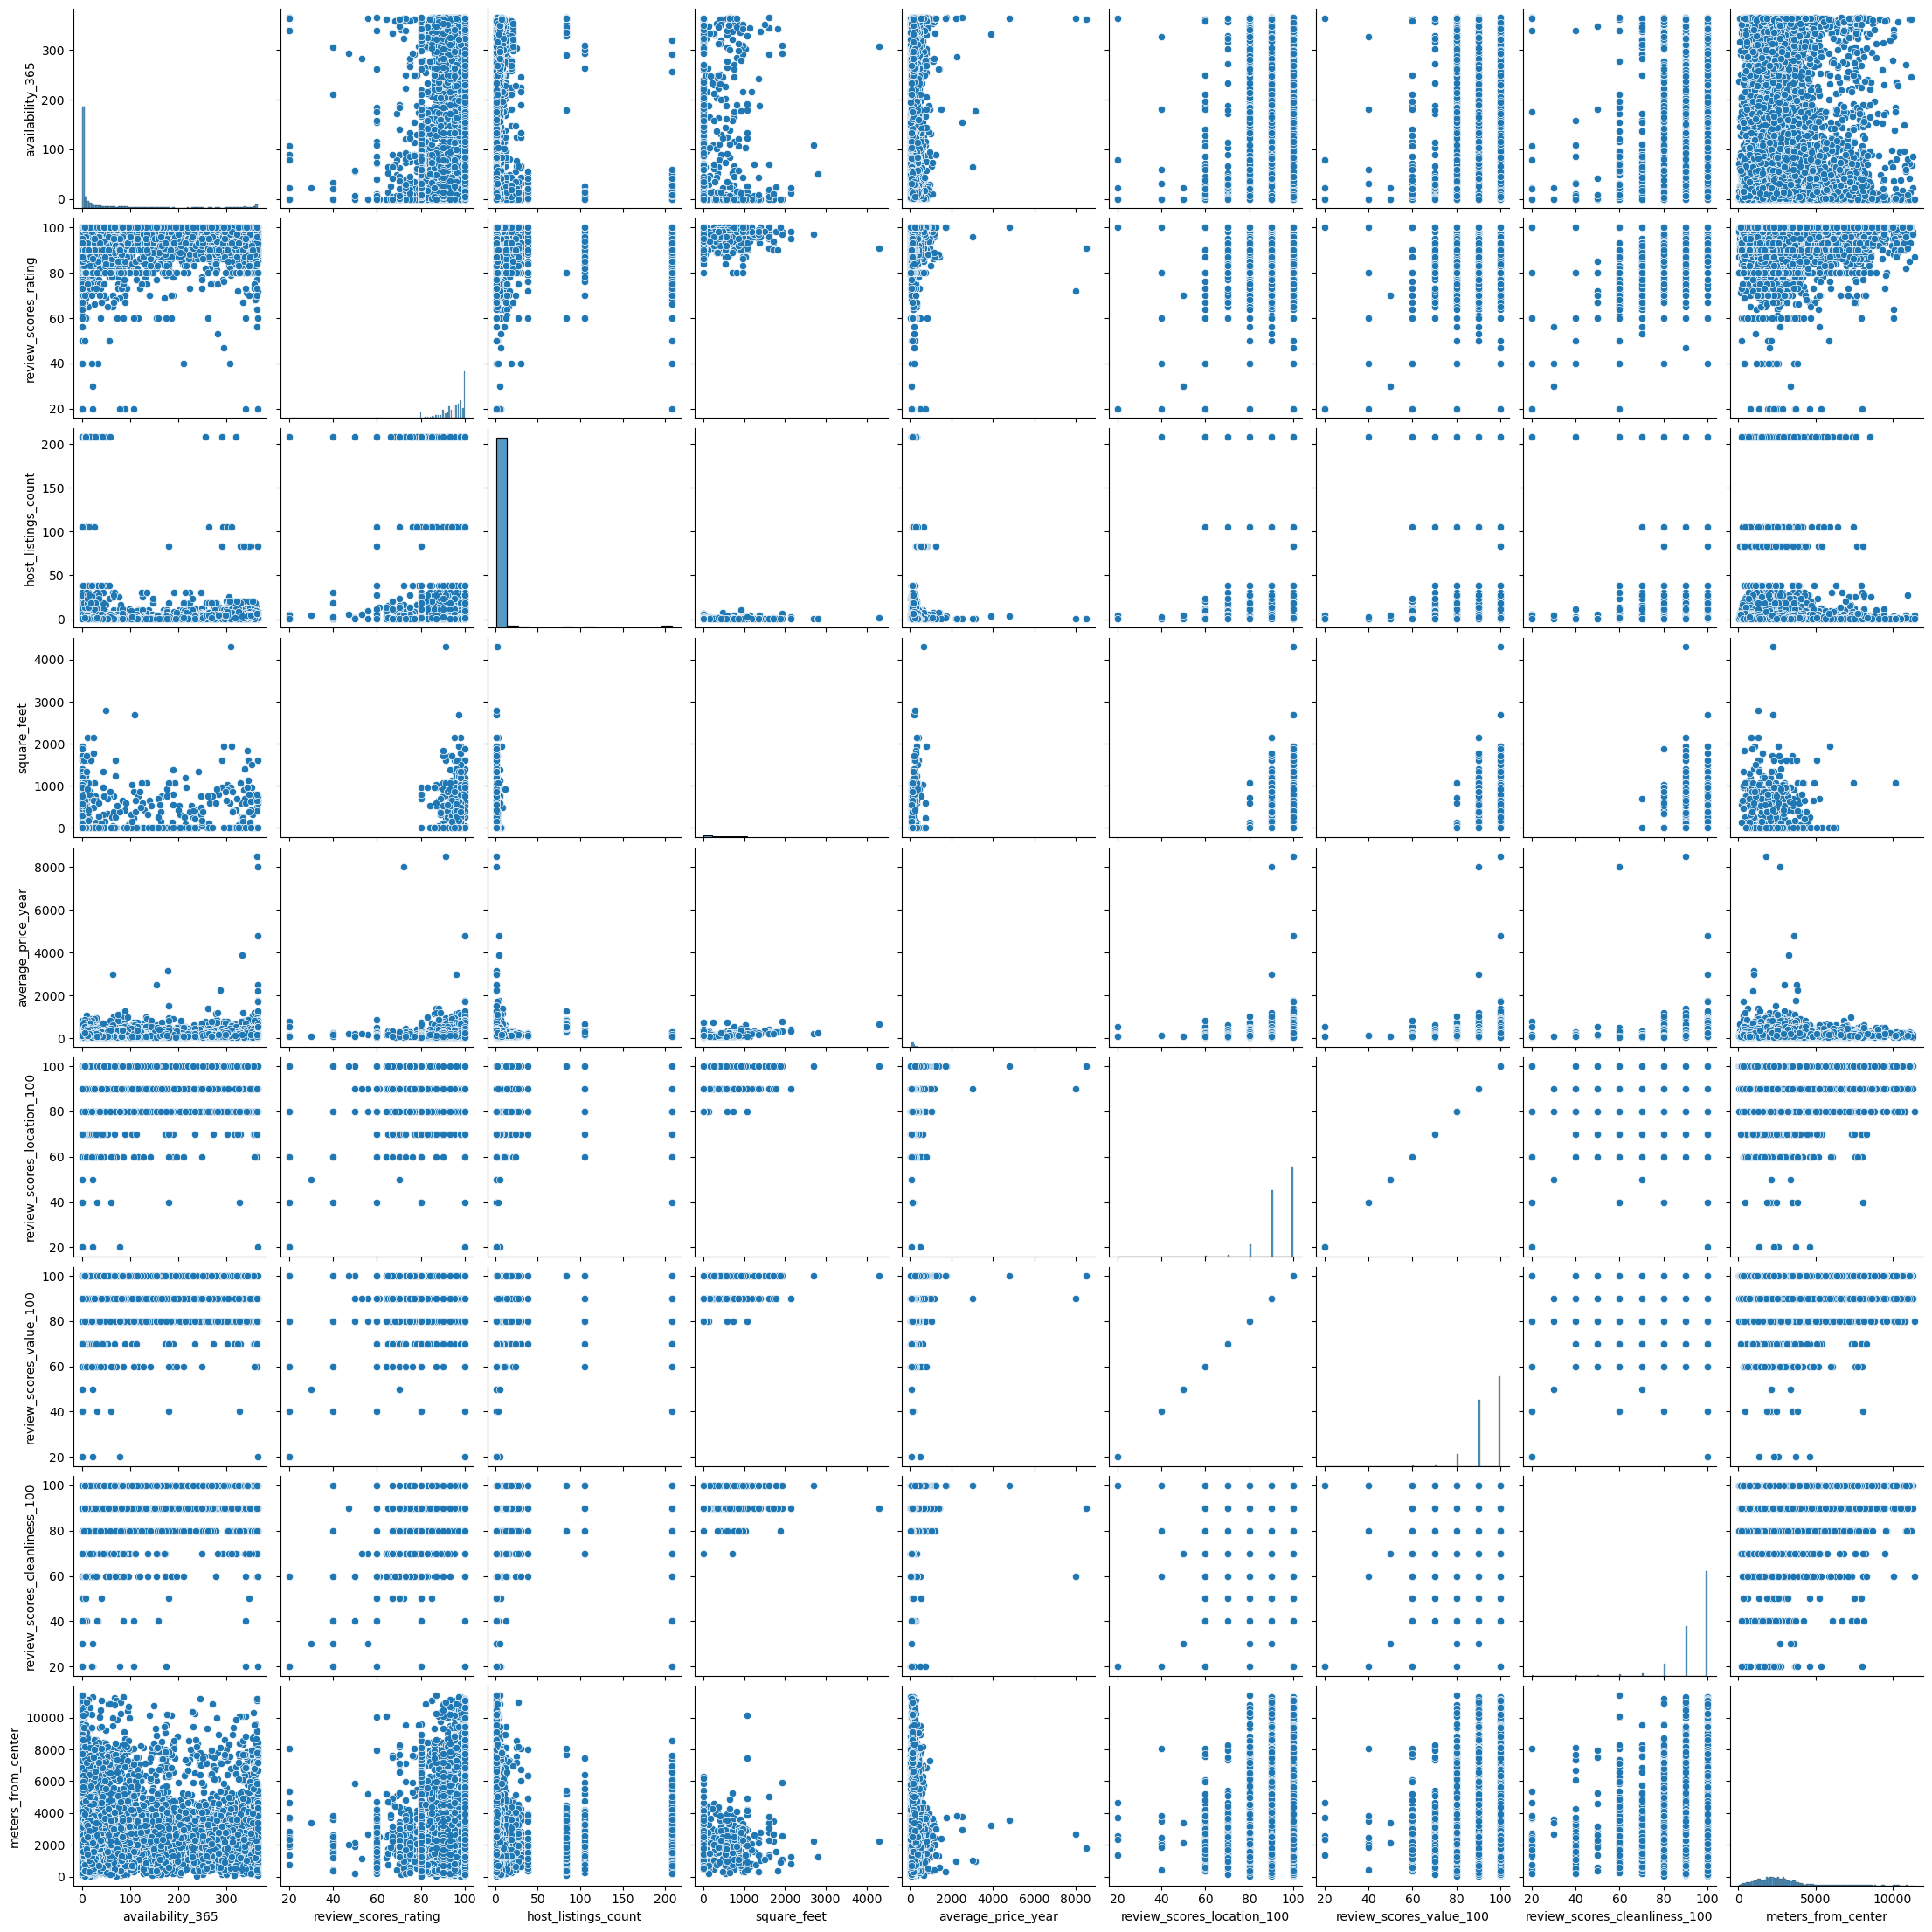

In [248]:
g = sns.pairplot(df_sub2)

#### These plots reflect data that, even after cleaning, is heavily skewed in some way. This makes it difficult to identify clear trends or patterns immediately.

#### Categorical Plot

In [ ]:
sns.histplot(df_sub1['meters_from_center'], bins = 20, kde = True)

##### The highest count of listings are between 1000 and 3000 meters from the center. 

In [250]:
df_sub1['meters_from_center'].describe()

count    20030.000000
mean      2679.424316
std       1624.734096
min         22.258728
25%       1645.234699
50%       2427.630452
75%       3271.239872
max      11421.314722
Name: meters_from_center, dtype: float64

In [252]:
#creating categories
df_sub1.loc[df_sub1['meters_from_center'] < 1625, 'location_type'] = 'Central Location'
df_sub1.loc[(df_sub1['meters_from_center']>= 1625) & (df_sub1['meters_from_center']<3271), 'location_type'] = 'Near City Center'
df_sub1.loc[df_sub1['meters_from_center'] >=3271, 'location_type'] = 'Outside City Center/Suburban'

C:\Users\artoe\AppData\Local\Temp\ipykernel_2908\1474044830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub1.loc[df_sub1['meters_from_center'] < 1625, 'location_type'] = 'Central Location'


In [254]:
df_sub1['location_type'].value_counts()

location_type
Near City Center                10087
Outside City Center/Suburban     5009
Central Location                 4934
Name: count, dtype: int64

In [293]:
#sampling data for catplots
np.random.seed(4)
dev = np.random.rand(len(df_sub1)) <= 0.8

In [295]:
big = df_sub1[dev]
small = df_sub1[~dev]

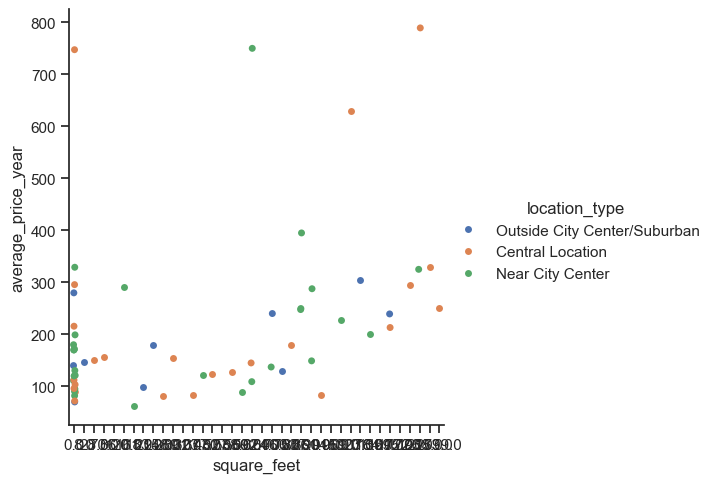

In [297]:
sns.set(style="ticks")
g= sns.catplot(x="square_feet", y="average_price_year", hue="location_type", data=small)
plt.show()

##### This category plot shows that location type does not really have any effect on price or size.

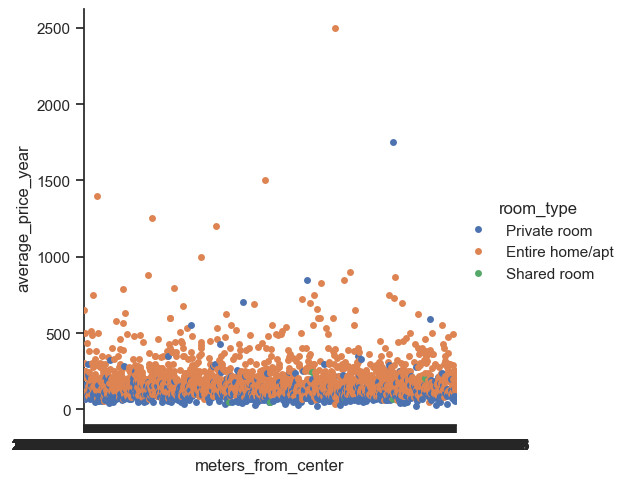

In [330]:
sns.set(style="ticks")
g = sns.catplot(x="meters_from_center", y="average_price_year", hue="room_type", data=small)

##### This plot shows that accommodations of all types are distributed throughout the city. While the difference between private room and entire home prices are not that much, entire homes represent the highest prices overall. Shared rooms, meanwhile, are the least common type of accommodation

#### Revisiting Questions from 6.1

##### Many of these questions would require textual analysis (e.g. commonly-mentioned words in reviews). Questions regarding popular neighbourhoods, as well as popular surrounding municipalities, can be better answered through geospatial analysis, as we only have names and coordinate information so far. 
##### The questions regarding changes in price and popularity over the year can be answered once the calendar table is joined to the detailed listings table. 

#### Additional Hypotheses

##### Based on this analysis, one possible hypothesis is that accommodation offered by hosts with multiple listings is of lower quality than accommodation offered by hosts with one or a few listings. This could be due to the fact that hosts offering multiple accommodations may be more profit-motivated, the properties offered may be of cheaper quality or the host does not invest as much time, money or effort into the overall guest experience. 
##### Another possible hypothesis is that AirBnB guests visiting Amsterdam consider value for money to be particularly important, based on the relatively strong positive correlation between perceived value for money and overall review score rating, as well as the slight negative correlation between price and review score rating. 